Our calculations show that the part of the error that decays slowest for each $N$ (and therefore that which dominates after a large number of iterations) has a form very similar to the lowest Fourier mode that will fit into the domain. The convergence is thus limited by large scales, not by small scales.

This motivates the multigrid method. The idea is that the error left after a few iterations is on scales much larger than the grid scale. The correction needed to the approximate solution to remove this error may therefore be determined more efficiently by transferring the error to a coarser grid, iterating on the coarser grid where convergence is more rapid, then transferring the calculated correction back to the finer grid, updating the
approximate solution, and iterating on the finer grid again. The whole procedure is then repeated until the required convergence is achieved. Furthermore the procedure need not be confined to two grids. It is natural to improve the convergence of the coarse grid problem by transferring the error in that to a coarser grid still, and so on.

The multigrid procedure may be defined more exactly as follows. Assume that we have a sequence of $K$ grids, labelled by $J = 1, \dots, K$ in increasing order of fineness, the $J$-th grid having size $N_J \times N_J$. It is convenient to take the mesh spacing of the $(J-1)-th$ grid to be twice that of the $J$-th grid, i.e., $N_J = 2N_{J-1} - 1$.

On the Jth grid we wish to solve the linear system
\begin{equation}
    \mathcal{L}_Ju^{(J)} = r^{(J)},
\end{equation}
where the operator $\mathcal{L}_J$ corresponds to the finite-difference formula, if $N_J = N$. Note that it is important when writing down the form of $\mathcal{L}$ for arbitrary $J$ to remember that $h$ in the formula must be replaced by $1/(N_J - 1)$.


---

*   Descending part of multigrid cycle:

    1.  Apply the Gauss-Seidel iteration scheme (hereafter G-S) $\nu_1$ times   to obtain an approximate solution $\tilde{u}^{(J)}$. The error $v^{(J)}$ in this solution therefore satisfies

        \begin{equation}
            \mathcal{L}_Jv^{(J)} = r^{(J)} - \mathcal{L}_J\tilde{u}^{(J)}.
        \end{equation}

    2.  Transfer the problem of determining $v^{(J)}$ to the coarser $(J - 1)$-th grid as

        \begin{equation}
            \mathcal{L}_{J-1}u^{(J-1)} = \mathcal{R}(r^{(J)} - \mathcal{L}_J\tilde{u}^{(J)}) = r^{(J-1)},
        \end{equation}

        where the operator $\mathcal{R}$ is known as the restriction operator. The descending part of the cycle repeats steps 1 and 2, transferring the correction at each stage to coarser and coarser grids, starting with $J = K$ and ending with $J = 2$.

*   Coarsest grid:

    3.  On the coarsest grid, apply G-S $\nu_2$ times to obtain an approximate solution $\tilde{u}^{(1)}$.

*   Ascending part of cycle:

    4. Transfer the approximate solution on the $(J - 1)$-th grid to the $J$-th grid to give a new approximation to the solution to the problem on that grid
    
        \begin{equation}
            \tilde{u}_{\text{new}}^{(J)} = \tilde{u}_{\text{old}}^{(J)} + \mathcal{P}\tilde{u}^{(J-1)},
        \end{equation}
        
        where $\mathcal{P}$ is the prolongation operator.

    5.  Apply G-S $\nu_3$ times on the $J$-th grid to improve the approximation $\tilde{u}^{(J)}$. The ascending part of the cycle repeats steps 4 and 5, starting with $J = 2$ and ending with $J = K$ to leave an approximate solution to the full problem.

Note that within each multigrid cycle, the approximate solution $\tilde{u}^{(J)}$ and the right-hand side $r^{(J)}$ are generated from the problem on the $(J + 1)$-th grid during the descending part of the cycle and must be stored for use again at the $J$-th level during the ascending part of the cycle. Each $r^{(J)}$
changes from cycle to cycle, except $r^{(K)}$ which is always equal to $f^{(K)}$ (i.e., the vector whose elements are $f$ evaluated at each internal point of the $K$-th grid).

It remains to specify the restriction and prolongation operators $\mathcal{R}$ and $\mathcal{P}$. It is natural to take both to be linear operators. Consider the following two sets of points:
\begin{equation}
    \text{part of $J$-th grid at $(i, j)$} \quad
    \begin{matrix}
        \bullet & \bullet & \bullet & \bullet & \bullet \\
        \bullet & \bullet & \bullet & \bullet & \bullet \\
        \bullet & \bullet & \bullet & \bullet & \bullet \\
        \bullet & \bullet & \bullet & \bullet & \bullet \\
        \bullet & \bullet & \bullet & \bullet & \bullet
    \end{matrix}
    \quad
    \begin{matrix}
        \mathcal{P} \\
        \longleftarrow \\
        \mathcal{R} \\
        \longrightarrow \\
    \end{matrix}
    \quad
    \begin{matrix}
        \bullet & \boldsymbol{\cdot} & \bullet & \boldsymbol{\cdot} & \bullet \\
        \boldsymbol{\cdot} & \boldsymbol{\cdot} & \boldsymbol{\cdot} & \boldsymbol{\cdot} & \boldsymbol{\cdot} \\
        \bullet & \boldsymbol{\cdot} & \bullet & \boldsymbol{\cdot} & \bullet \\
        \boldsymbol{\cdot} & \boldsymbol{\cdot} & \boldsymbol{\cdot} & \boldsymbol{\cdot} & \boldsymbol{\cdot} \\
        \bullet & \boldsymbol{\cdot} & \bullet & \boldsymbol{\cdot} & \bullet
    \end{matrix}
    \quad \text{part of $(J - 1)$-th grid at $(k, l)$}
\end{equation}
That on the left is a set of points in the $J$-th grid with the centre point labelled $(i, j)$. That on the right is the same region in the $(J - 1)$-th grid. In the latter only those points marked with a $\bullet$ are included in the grid, with the centre point now labelled $(k, l)$, say.

The prolongation operator $\mathcal{P}$ maps a function defined on points in the $(J - 1)$-th grid onto the points in the $J$-th grid. Similarly the restriction operator $\mathcal{R}$ maps a function defined on points in the $J$-th grid onto the points in the $(J - 1)$-th grid. It is convenient to represent both by the masks:
\begin{equation}
    \mathcal{P} =
    \begin{pmatrix}
        \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
        \frac{1}{2} &      1      & \frac{1}{2} \\
        \frac{1}{4} & \frac{1}{2} & \frac{1}{4}
    \end{pmatrix}
    , \quad \mathcal{R} =
    \begin{pmatrix}
        \frac{1}{16} & \frac{1}{8} & \frac{1}{16} \\
        \frac{1}{8}  & \frac{1}{4} & \frac{1}{8} \\
        \frac{1}{16} & \frac{1}{8} & \frac{1}{16}
    \end{pmatrix}.
\end{equation}
That for $\mathcal{P}$ means that if $f = 0$ for all points in the $(J - 1)$-th grid except that labelled $(k, l)$, then $\mathcal{P}f$ will be zero at all points on the $J$-th grid except for the square of nine points centred on $(i, j)$ where it will take the values in the mask. Also, $\mathcal{P}f$ may be evaluated for general functions $f$ by linearity. Each number in the mask for $\mathcal{R}$ represents the contribution from a point in the $J$-th grid, e.g., the square of nine points centred on $(i, j)$ to the point $(k, l)$ in the $(J - 1)$-th grid. Note that points outside this square make no contribution.


In [62]:
import numpy as np
from matplotlib import pyplot as plt

def source_function(N):
    '''
    Generates the source term f(x,y) = x(1-x)y^2(1-y) on an NxN grid.
    '''
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)
    return X * (1 - X) * Y**2 * (1 - Y)

def gauss_seidel(u, f, h, iterations):
    '''
    Applies Gauss-Seidel iterations.
    Args:
        u: Current approximation (NxN)
        f: Right hand side (NxN)
        h: Grid spacing
        iterations: Number of sweeps
    '''
    N = u.shape[0]
    h2 = h * h

    # We only update interior points
    for _ in range(iterations):
        for i in range(1, N-1):
            for j in range(1, N-1):
                u[i, j] = 0.25 * (u[i-1, j] + u[i+1, j] +
                                  u[i, j-1] + u[i, j+1] -
                                  h2 * f[i, j])
    return u

def calculate_residual(u, f, h):
    '''
    Calculates r = f - Lu on the interior.
    '''
    N = u.shape[0]
    r = np.zeros((N, N))
    h2_inv = 1.0 / (h * h)

    # L operator: (u_left + u_right + u_up + u_down - 4u_center) / h^2
    # Residual r = f - L u
    for i in range(1, N-1):
        for j in range(1, N-1):
            Laplacian = h2_inv * (u[i-1, j] + u[i+1, j] +
                                  u[i, j-1] + u[i, j+1] -
                                  4*u[i, j])
            r[i, j] = Laplacian - f[i, j]

    return r

def restriction(r_fine):
    '''
    Restricts residual from fine grid (N_f) to coarse grid (N_c).
    N_f = 2*N_c - 1
    '''
    N_f = r_fine.shape[0]
    N_c = (N_f + 1) // 2
    r_coarse = np.zeros((N_c, N_c))

    # Iterate over coarse grid interior points
    for i in range(1, N_c-1):
        for j in range(1, N_c-1):
            # Map to fine grid coordinates
            fi, fj = 2*i, 2*j

            # Apply mask
            # Center (1/4)
            val = 4.0 * r_fine[fi, fj]

            # Direct neighbors (1/8)
            val += 2.0 * (r_fine[fi+1, fj] + r_fine[fi-1, fj] +
                          r_fine[fi, fj+1] + r_fine[fi, fj-1])

            # Diagonal neighbors (1/16)
            val += 1.0 * (r_fine[fi+1, fj+1] + r_fine[fi-1, fj+1] +
                          r_fine[fi+1, fj-1] + r_fine[fi-1, fj-1])

            r_coarse[i, j] = val / 16.0

    return r_coarse

def prolongation(v_coarse):
    '''
    Interpolates correction v from coarse grid to fine grid.
    Adds to the existing fine grid correction which starts as 0.
    '''
    N_c = v_coarse.shape[0]
    N_f = 2 * N_c - 1
    v_fine = np.zeros((N_f, N_f))

    # Iterate over coarse grid to splash values onto fine grid
    for i in range(1, N_c-1):
        for j in range(1, N_c-1):
            # Center (1)
            fi, fj = 2*i, 2*j
            v_fine[fi, fj] += v_coarse[i, j]

            # Direct neighbors (1/2)
            v_fine[fi+1, fj] += 0.5 * v_coarse[i, j]
            v_fine[fi-1, fj] += 0.5 * v_coarse[i, j]
            v_fine[fi, fj+1] += 0.5 * v_coarse[i, j]
            v_fine[fi, fj-1] += 0.5 * v_coarse[i, j]

            # Diagonal neighbors (1/4)
            v_fine[fi+1, fj+1] += 0.25 * v_coarse[i, j]
            v_fine[fi-1, fj+1] += 0.25 * v_coarse[i, j]
            v_fine[fi+1, fj-1] += 0.25 * v_coarse[i, j]
            v_fine[fi-1, fj-1] += 0.25 * v_coarse[i, j]

    return v_fine

def multigrid_cycle(u, f, h, nu1, nu2, nu3, min_grid_size=3):
    '''
    Recursive multigrid cycle function.
    '''
    N = u.shape[0]

    # Base Case: Coarsest Grid
    if N <= min_grid_size:
        # Solve exactly or smooth significantly
        return gauss_seidel(u, f, h, nu2)

    # Pre-smoothing (Descending)
    u = gauss_seidel(u, f, h, nu1)

    # Compute Residual
    r = calculate_residual(u, f, h)

    # Restriction
    f_coarse = restriction(r)
    f_coarse[0, :] = 0.0
    f_coarse[-1, :] = 0.0
    f_coarse[:, 0] = 0.0
    f_coarse[:, -1] = 0.0

    # Recursion (Solve for error e on coarse grid: L e = r)
    N_c = f_coarse.shape[0]
    e_coarse = np.zeros((N_c, N_c))
    h_coarse = h * 2.0

    e_coarse = multigrid_cycle(e_coarse, f_coarse, h_coarse, nu1, nu2, nu3, min_grid_size)

    # Prolongation
    e_fine = prolongation(e_coarse)

    # Correction (u_new = u_old - error)
    u = u - e_fine

    # Post-smoothing (Ascending)
    u = gauss_seidel(u, f, h, nu3)

    return u

def run_multigrid_test(N_fine=65, nu=(2, 10, 2), coarse_limit=3):
    # Setup
    h = 1.0 / (N_fine - 1)
    f = source_function(N_fine)
    u = np.zeros((N_fine, N_fine))

    print(f"\nMultigrid Test N={N_fine}, nu={nu}, Coarsest={coarse_limit}")

    max_cycles = 15
    tolerance = 1e-9
    residuals = []

    # Calculate initial residual
    r = calculate_residual(u, f, h)
    initial_res = np.max(np.abs(r))
    residuals.append(initial_res)

    for cycle in range(1, max_cycles + 1):
        u = multigrid_cycle(u, f, h, nu[0], nu[1], nu[2], min_grid_size=coarse_limit)

        # Check residual
        r = calculate_residual(u, f, h)
        max_res = np.max(np.abs(r))
        residuals.append(max_res)

        ratio = residuals[-1]/residuals[-2] if residuals[-2] > 0 else 0
        rate = -np.log(ratio) if ratio > 0 else 0
        if max_res < tolerance:
            break

    print(f"Converged in {cycle} cycles.")

    # Efficiency Calc
    # Total ops per cycle estimate
    # 1 Work Unit = 1 GS sweep on finest grid ~ 7*N^2 ops
    # Cycle cost approx (nu1+nu3) * Sum(1/4^k) + overhead
    wu_per_cycle = (nu[0] + nu[2]) * (4.0/3.0)
    # Add small 20% overhead for restriction/prolongation
    wu_per_cycle *= 1.2

    eff_measure = rate / wu_per_cycle
    print(f"Estimated Efficiency (Rate / Work Unit): {eff_measure:.4f}")
    return u

In [73]:
N = 129
# Standard Case
u_1 = run_multigrid_test(N_fine=N, nu=(2, 20, 2), coarse_limit=3)
# Investigating Coarsest Grid Resolution, stopping early
u_2 = run_multigrid_test(N_fine=N, nu=(2, 20, 2), coarse_limit=15)
# Investigating GS Iterations
u_3 = run_multigrid_test(N_fine=N, nu=(1, 10, 1), coarse_limit=3)
u_4 = run_multigrid_test(N_fine=N, nu=(4, 40, 4), coarse_limit=3)


Multigrid Test N=129, nu=(2, 20, 2), Coarsest=3
Converged in 8 cycles.
Estimated Efficiency (Rate / Work Unit): 0.3525

Multigrid Test N=129, nu=(2, 20, 2), Coarsest=15
Converged in 7 cycles.
Estimated Efficiency (Rate / Work Unit): 0.3743

Multigrid Test N=129, nu=(1, 10, 1), Coarsest=3
Converged in 12 cycles.
Estimated Efficiency (Rate / Work Unit): 0.4332

Multigrid Test N=129, nu=(4, 40, 4), Coarsest=3
Converged in 6 cycles.
Estimated Efficiency (Rate / Work Unit): 0.2318


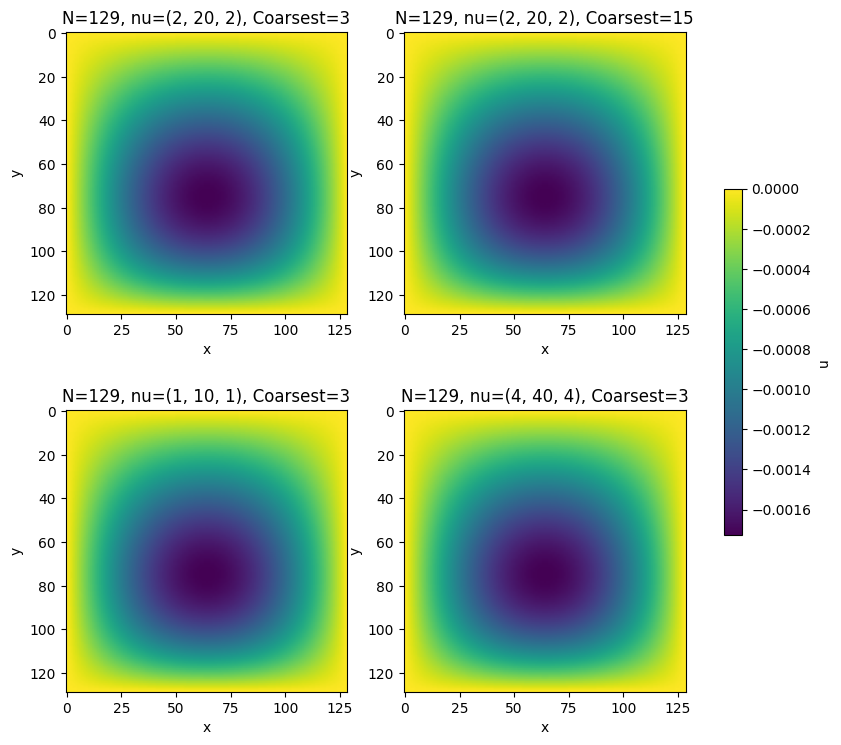

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(10, 9))
for i in range(2):
    for j in range(2):
        im = ax[i, j].imshow(u_1, cmap='viridis')
        ax[i, j].set_xlabel('x')
        ax[i, j].set_ylabel('y')
cbar = fig.colorbar(im, ax=ax, shrink=0.5)
cbar.set_label('u')
ax[0, 0].set_title('N=129, nu=(2, 20, 2), Coarsest=3')
ax[0, 1].set_title('N=129, nu=(2, 20, 2), Coarsest=15')
ax[1, 0].set_title('N=129, nu=(1, 10, 1), Coarsest=3')
ax[1, 1].set_title('N=129, nu=(4, 40, 4), Coarsest=3')
plt.show()

Observe that if we set the coarse limit high, then the convergence rate drops significantly. This is because the efficiency of multigrid relies on the coarse grid solving the smooth error components of the fine grid. Error modes that are smooth on a finer grid look oscillatory on coarser grid and are killed there. If we stop prematurely on a grid that is too coarse, then error components with wavelengths larger than the scale of the 1grid are never targeted. They remain smooth at all levels visited, leading to the slow convergence typical of standard Gauss-Seidel.

*   For small $\nu$, the method is efficient per operation but might not smooth the high frequencies enough before restriction. This can cause aliasing where high-frequency error on the fine grid manifests as low-frequency error on the coarse grid, which corrupts the correction.
*   For large $\nu$, the convergence per cycle improves slightly, but the computational cost per cycle increase sharply. The work unit cost increases linearly with $\nu$.

To compare these methods fairly, we cannot just look at the number of cycles; we must look at the cost. We define the efficiency measure $\eta$ as the logarithm of the residual reduction factor divided by the total operations in work units, i.e., the asymptotic rate of convergence over the computational effort.

Let $N_K$ be the fine grid size. Let one work unit (WU) be the cost of one Gauss-Seidel sweep over the finest grid $N_K \times N_K$. Then on the fine grid $N_K$, by definition $1$ sweep equals one work unit. On the next grid $N_{K-1}$, we have $1/4$ of the points so $1$ sweep is $1/4$ work units. Thus, the total cost of smoothing in one multigrid cycle is approximately
\begin{equation}
    (\nu_1 + \nu_3) \left( 1 + \frac{1}{4} + \frac{1}{16} + \dots \right) \approx \frac{4}{3} (\nu_1 + \nu_3) \,\mathrm{WU}.
\end{equation}
However, we need to account for the overhead as restriction and prolongation also involve iterating over grid points. Both involve approximately $9$ operations per coarse point (of which there are $1/4$ of fine points). This is approximately equivalent to $20\%$ of a G-S sweep.

This measure is superior to CPU time because it is implementation independent. It balances the trade-off of increasing $\nu$ improves the numerator (better convergence) but increases the denominator (more work). An optimal $\nu$ would maximise this ratio.

In [81]:
import numpy as np
import time

def run_investigation():
    # Parameters
    N_values = [17, 33, 65, 129, 257]
    nu = (2, 20, 2)
    coarse_limit = 3

    print(f"Parameters: nu={nu}, Coarsest Limit N={coarse_limit}\n")
    print(f"{'-'*90}")
    print(f"{'N_K':<6} | {'Cycles':<8} | {'Final Rate (r_inf)':<18} | {'Red. Factor (rho)':<18} | {'Time (s)':<10}")
    print(f"{'-'*90}")

    results = []

    for N in N_values:
        # Setup problem
        h = 1.0 / (N - 1)
        f = source_function(N)
        u = np.zeros((N, N))
        max_cycles = 30
        residuals = []
        tolerance = 1e-9
        start_time = time.time()

        # Initial residual
        r = calculate_residual(u, f, h)
        residuals.append(np.max(np.abs(r)))

        for cycle in range(max_cycles):
            u = multigrid_cycle(u, f, h, nu[0], nu[1], nu[2], min_grid_size=coarse_limit)

            r = calculate_residual(u, f, h)
            max_res = np.max(np.abs(r))
            residuals.append(max_res)
            if max_res < tolerance:
                stop_cycle = cycle + 1
                break

        end_time = time.time()
        elapsed = end_time - start_time

        # Calculate convergence metrics, take the average of the last 3 ratios
        final_ratios = []
        for i in range(1, 4):
            if residuals[-i-1] > 1e-20: # Avoid division by zero
                final_ratios.append(residuals[-i] / residuals[-i-1])

        avg_rho = np.mean(final_ratios)
        r_inf = -np.log(avg_rho)

        results.append({
            'N': N,
            'rate': r_inf,
            'rho': avg_rho,
            'time': elapsed
        })

        print(f"{N:<6} | {stop_cycle:<8} | {round(r_inf, 8):<18} | {round(avg_rho, 8):<18} | {round(elapsed, 8):<10}")

    print("")
    print(f"{'-'*90}")
    print(f"{'N':<6} | {'Target Tol (N^-2)':<18} | {'MG Cycles Needed':<16} | {'GS Sweeps Needed':<16} | {'Speedup Factor':<16}")
    print(f"{'-'*90}")

    for res in results:
        N = res['N']
        rho_mg = res['rho']

        # Target reduction
        target_reduction = N**(-2)

        # Multigrid cycles
        if rho_mg < 1.0:
            k_mg = np.log(target_reduction) / np.log(rho_mg)
        else:
            k_mg = float('inf')

        # Gauss-Seidel sweeps
        rho_gs_est = 1 - (np.pi**2)/(N**2)
        k_gs = np.log(target_reduction) / np.log(rho_gs_est)

        # Operation count estimation
        ops_mg = k_mg * 1.33
        ops_gs = k_gs * 1.0

        speedup = ops_gs / ops_mg

        print(f"{N:<6} | {round(target_reduction, 8):<18} | {round(k_mg, 8):<16} | {round(k_gs, 8):<16} | {round(speedup, 8):<16}")

run_investigation()

Parameters: nu=(2, 20, 2), Coarsest Limit N=3

------------------------------------------------------------------------------------------
N_K    | Cycles   | Final Rate (r_inf) | Red. Factor (rho)  | Time (s)  
------------------------------------------------------------------------------------------
17     | 8        | 2.3589995          | 0.09451474         | 0.02470708
33     | 8        | 2.2827525          | 0.10200306         | 0.11545849
65     | 8        | 2.27254081         | 0.10305002         | 0.41344976
129    | 8        | 2.27066946         | 0.10324304         | 2.82149482
257    | 8        | 2.2698405          | 0.10332866         | 6.99526215

------------------------------------------------------------------------------------------
N      | Target Tol (N^-2)  | MG Cycles Needed | GS Sweeps Needed | Speedup Factor  
------------------------------------------------------------------------------------------
17     | 0.00346021         | 2.40204658       | 163.07367714    

Based on the theory of the multigrid method and the prelimiary results from the previous investigation, we provide some explaination for the optimal parameter choices:

*   The resolution of the coarsest grid $N_1$ should be as small as small as possible. The efficiency of the multigrid method depends on the coarse grids resolving the low-frequency error components. If we stop the coarsening process too early, then smooth error modes that fit on now coarsest grid but not on smaller scales will persist. These modes converge very slowly using Gauss-Seidel. Descending to the smallest possible grid ensures that the lowest frequency errors are solved efficiently.

*   The smoothing parameters $\nu_1$ and $\nu_3$ should also be quite small values, typically near $3$. Gauss-Seidel is very efficient at smoothing high-frequency errors in the first few sweeps. After a few iterations, the error becomes smooth, and further iterations on the fine grid yield diminishing returns. It is computationally cheaper to move to a coarser grid than to continue on the fine grid.

*   The coarse solve parameter $\nu_2$ should be taken large. The coarsest grid has negligible computational cost compared to the fine grid, so we can afford to spend more resource there to ensure that the low-frequency correction is precise.

Most notably, the convergence rate is independent of the grid size $N_K$. Unlike the simple Gauss-Seidel method where the convergence degrades rapidly as the grid gets larger $r_\infty \propto 1/N^2$, the Multigrid method maintains a constant, rapid convergence rate regardless of resolution.

We compare the cost to reach an accuracy consistent with the truncation error. The finite difference discretisation has a truncation error of $O(h^2) = O(N^{-2})$.

Gauss-Seidel only:
*   Convergence rate: $r_\infty \approx O(N^{-2})$.
*   Iterations required: To reduce error by a factor of $N^{-2}$ with a rate of $N^{-2}$,
\begin{equation}
    m \approx \frac{\log(N^{-2})}{\log(1 - cN^{-2})} \approx O(N^2 \log N).
\end{equation}
*   Cost per iteration: $O(N^2)$ updates for $N \times N$ points.
*   Total operations: $O(N^2) \times O(N^2 \log N) = O(N^4 \log N)$.


Multigrid method:
*   Convergence rate: $r_\infty \approx O(1)$.
*   Iterations (cycles) required: To reduce error by a factor of $N^{-2}$ with a constant rate,
\begin{equation}
    m \approx \frac{\log(N^{-2})}{\text{Const.}} \approx O(\log N).
\end{equation}
*   Cost per cycle: A multigrid cycle involves work on the fine grid $N^2$, then the grid $N^2/4$, then the next grid $N^2/16$ and so on. This geometric series bounded by $\frac{4}{3}N^2$. Hence, the cost is $O(N^2)$.
*   Total operations: $O(N^2) \times O(\log N) = O(N^2 \log N)$.

This represents an improvement in efficiency of order $O(N^2)$.